Possible Use Cases:

Marketing Spend Analysis: Determine which advertising channel has the greatest impact on sales.
Sales Prediction: Use linear regression to predict sales based on advertising spend across different channels.
Channel Effectiveness: Compare the effectiveness of each advertising channel and optimize future marketing budgets.
Business Strategy: Identify trends in sales based on historical advertising spending to inform business decisions.ions.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file_path = 'Advertising.csv'

data = pd.read_csv(file_path)

data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


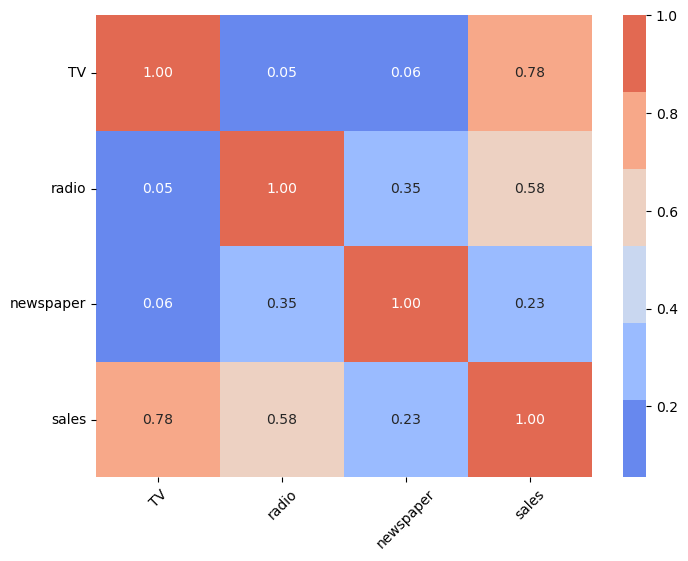

In [13]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
color = sns.color_palette('coolwarm')
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=color)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [14]:
print(data.corr())

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


Widzimy dość silną korelację między telewizją a zyskami. ~78%

Teraz zajmiemy się predykcją sprzedaży na podstawie każdej metody reklamy.

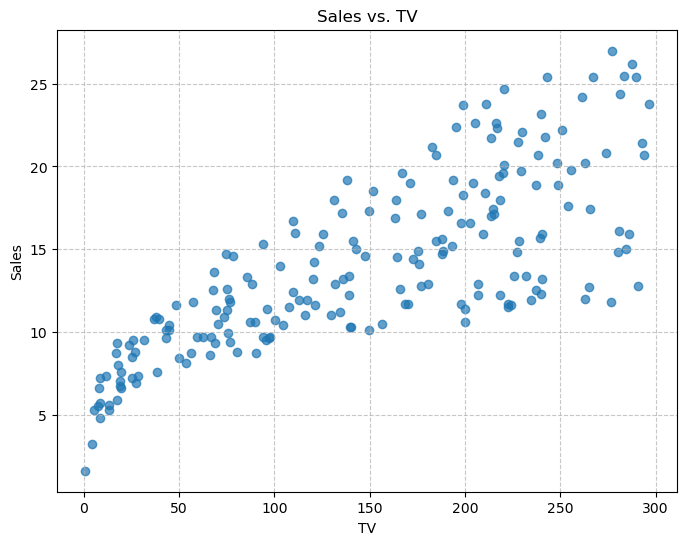

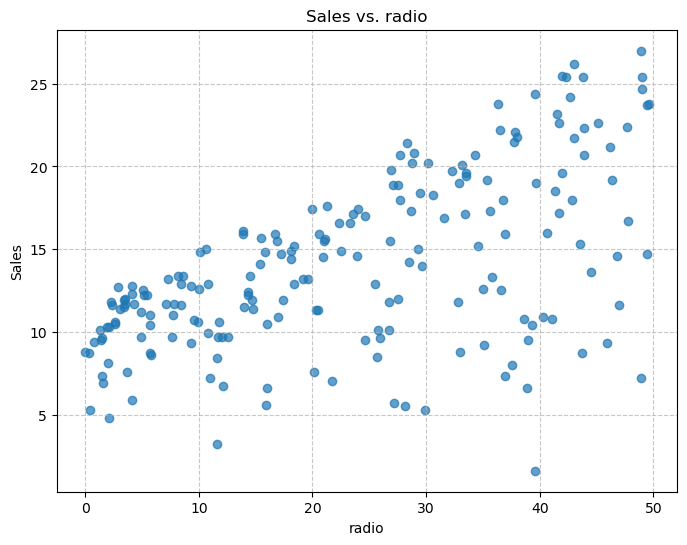

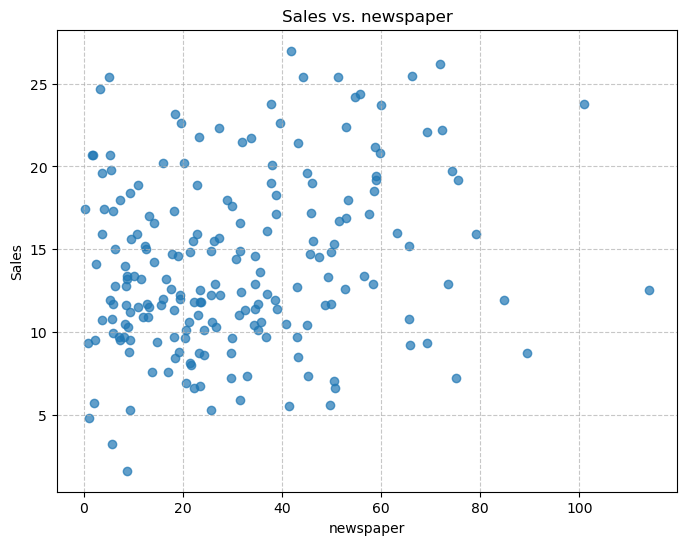

In [15]:
for column in data.columns:
    if column != 'sales': 
        plt.figure(figsize=(8, 6))
        plt.scatter(data[column], data['sales'], alpha=0.7)
        
        plt.xlabel(column)
        plt.ylabel("Sales")
        plt.title(f"Sales vs. {column}")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

Zauważmy, że mimo najwyższego współczynnika korelacji między zyskiem a metodą reklamy, który przypada na TV (78%), to na wykresie dane radiowe dają niemal identyczne rezulataty mimo 10 krotnie niższych kosztów.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

X = data[['TV', 'radio', 'newspaper']]
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100

print(f'Średni błąd kwadratowy (RMSE): {rmse:.2f}')
print(f'Współczynnik determinacji (R²): {r2:.2f}')
print(f'Średni bezwzględny błąd procentowy (MAPE): {mape:.2f}%')

#Przykładowa prognoza:
new_data = pd.DataFrame({
    'TV': [200, 40, 40],
    'radio': [40, 200, 40],
    'newspaper': [40, 40, 200]
})

predicted_sales = model.predict(new_data)

for i, sale in enumerate(predicted_sales):
    print(f'Prognozowane zyski dla indeksu {i}: {sale:.2f}')

Średni błąd kwadratowy (RMSE): 1.78
Współczynnik determinacji (R²): 0.90
Średni bezwzględny błąd procentowy (MAPE): 15.20%
Prognozowane zyski dla indeksu 0: 19.60
Prognozowane zyski dla indeksu 1: 42.72
Prognozowane zyski dla indeksu 2: 12.89


Analiza prognozowanych zysków wskazuje, że najwyższy przychód osiągnięto dla wiersza, w którym łączny nakład na reklamę wyniósł 197 jednostek, z czego około 81% przeznaczono na reklamę radiową. Z kolei wiersz z większym nakładem wynoszącym aż 370 jednostek, gdzie również blisko 81% środków przeznaczono na reklamę tym razem telewizyjną, wykazał niższy prognozowany zysk, różniący się niemal o 10 jednostek.

Podsumowując najlepiej zyskowną formą reklamy okazało się radio.